## Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.7.2'

In [3]:
# Define path
path = r'C:\Users\Leeza\Desktop\Data Analytics\Data Immersion\6. Advanced analytics and dashboard Designs\Balanced flight cancellation and delay - 2019-2023'

In [4]:
# Reading Data
df = pd.read_pickle(os.path.join(path, 'Prepared Data', 'flight_info.pkl'))

In [5]:
df.shape

(1551842, 20)

In [6]:
df.columns

Index(['FL_DATE', 'AIRLINE', 'FL_NUMBER', 'ORIGIN', 'DEST', 'DEP_TIME',
       'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN',
       'ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED',
       'DISTANCE', 'DELAY_DUE_WEATHER', 'latitude', 'longitude'],
      dtype='object')

In [13]:
df_test = df[['DEP_TIME','DEP_DELAY','ARR_TIME', 'ARR_DELAY','DISTANCE','DELAY_DUE_WEATHER', 'latitude', 'longitude']]

### Correlation

In [14]:
# Create a correlation matrix using pandas
df_test.corr()

,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,DISTANCE,DELAY_DUE_WEATHER,latitude,longitude
DEP_TIME,1.000000,0.117810,0.635753,0.114200,-0.018631,-0.018318,-0.030926,0.001715
DEP_DELAY,0.117810,1.000000,0.016067,0.965265,0.023041,0.284591,-0.010134,0.022992
ARR_TIME,0.635753,0.016067,1.000000,0.021889,0.010792,-0.016084,-0.014313,0.001595
ARR_DELAY,0.114200,0.965265,0.021889,1.000000,0.002950,0.293201,-0.020443,0.011488
DISTANCE,-0.018631,0.023041,0.010792,0.002950,1.000000,-0.025005,-0.055443,-0.106663
DELAY_DUE_WEATHER,-0.018318,0.284591,-0.016084,0.293201,-0.025005,1.000000,0.010662,0.019056
latitude,-0.030926,-0.010134,-0.014313,-0.020443,-0.055443,0.010662,1.000000,-0.157556
longitude,0.001715,0.022992,0.001595,0.011488,-0.106663,0.019056,-0.157556,1.000000


## Correlation HeatMap

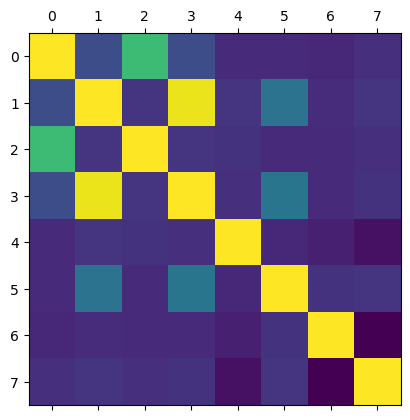

In [15]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_test.corr())
plt.show()

In [17]:
#current dir
cwd = os.getcwd()
cwd

'C:\\Users\\Leeza\\Desktop\\Data Analytics\\Data Immersion\\6. Advanced analytics and dashboard Designs\\Balanced flight cancellation and delay - 2019-2023\\Script'

In [20]:
# set current directory
os.chdir(r'C:\Users\Leeza\Desktop\Data Analytics\Data Immersion\6. Advanced analytics and dashboard Designs\Balanced flight cancellation and delay - 2019-2023\Visualizations')
cwd = os.getcwd()
cwd

'C:\\Users\\Leeza\\Desktop\\Data Analytics\\Data Immersion\\6. Advanced analytics and dashboard Designs\\Balanced flight cancellation and delay - 2019-2023\\Visualizations'

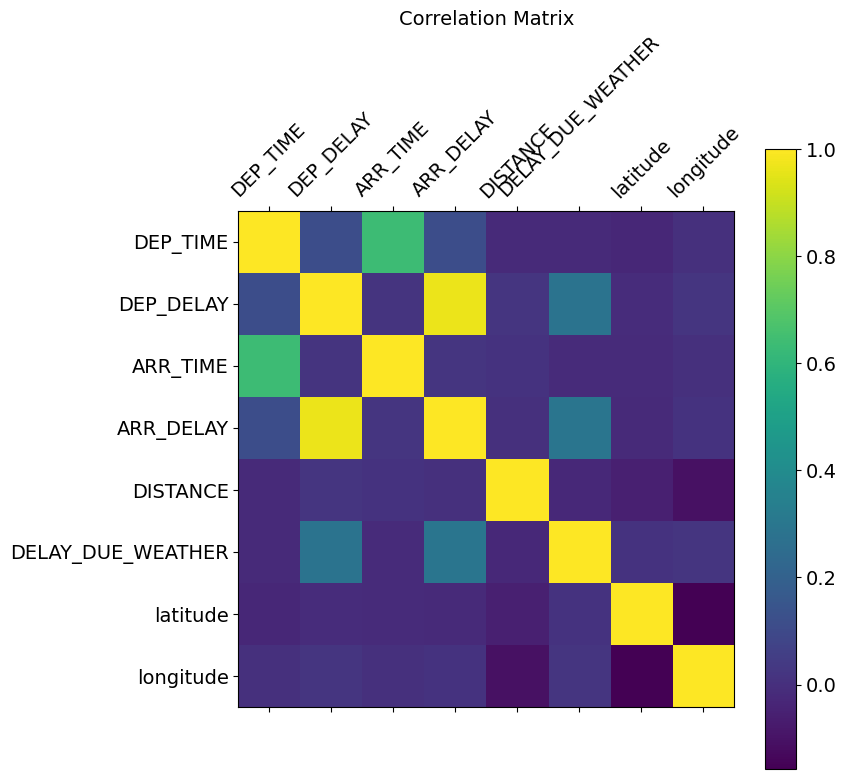

In [26]:
# Add labels, a legend, and change the size of the heatmap
# Save figure
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_test.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_test.shape[1]), df_test.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_test.shape[1]), df_test.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title
plt.savefig("corr.png")  # save figure

### From the above matrix, 
#### DEP_TIME and ARR_TIME (0.635753): There is a moderate positive correlation between departure time and arrival time. This makes sense, as flights departing later are likely to arrive later.

#### DEP_DELAY and ARR_DELAY (0.965265): There is a very strong positive correlation between departure delay and arrival delay. This indicates that if a flight is delayed at departure, it is highly likely to be delayed at arrival as well.

#### DISTANCE and longitude (-0.106663): There is a weak negative correlation between distance and longitude. This suggests that as the distance of the flight increases, there is a slight tendency for the longitude to decrease.

#### DELAY_DUE_WEATHER and ARR_DELAY (0.293201): There is a moderate positive correlation between delays due to weather and arrival delay. This suggests that weather-related delays are associated with increased arrival delays.

#### latitude and longitude (-0.157556): There is a weak negative correlation between latitude and longitude. This is expected, as latitude and longitude are geographical coordinates.

#### It's important to note that correlation does not imply causation, and these observations indicate statistical associations rather than causal relationships

## Plots for variables having strongest correlation

In [27]:
df1 = df [['DEP_DELAY','ARR_DELAY']]

C:\Users\Leeza\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


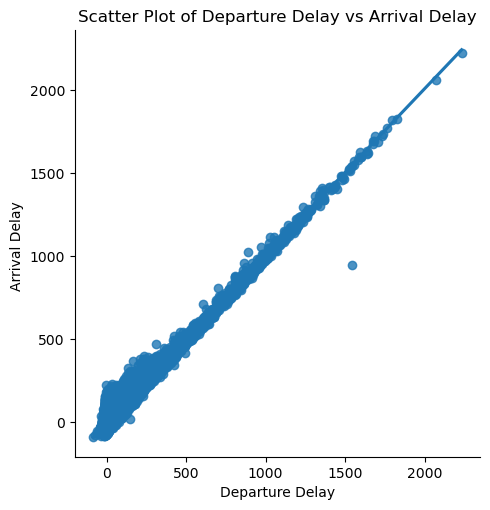

In [31]:
# Create a scatterplot for the "DEP_DELAY" and "ARR_DELAY" columns in seaborn

sns.lmplot(x = 'DEP_DELAY', y = 'ARR_DELAY', data = df1)
plt.title('Scatter Plot of Departure Delay vs Arrival Delay')
plt.xlabel('Departure Delay')
plt.ylabel('Arrival Delay ')
plt.savefig('scatter_plot.png')

#### The majority of points appear clustered near the origin, indicating a linear trend with a higher concentration of flights experiencing shorter delays at both departure and arrival.

#### As the delays increase, the points show a decreasing density, suggesting that fewer flights experience longer delays. This pattern could indicate that most flights are punctual or experience minimal delays.

#### The linear straight line through the points suggests a positive correlation between departure and arrival delays, meaning that flights with longer departure delays tend to have longer arrival delays.

#### The presence of an outlier below the line indicates a specific case where the arrival delay is less than expected given the departure delay. This outlier could represent a scenario where the flight made up time during its journey or experienced an unusually short delay upon arrival.

## Pair plot for entire dataset

C:\Users\Leeza\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


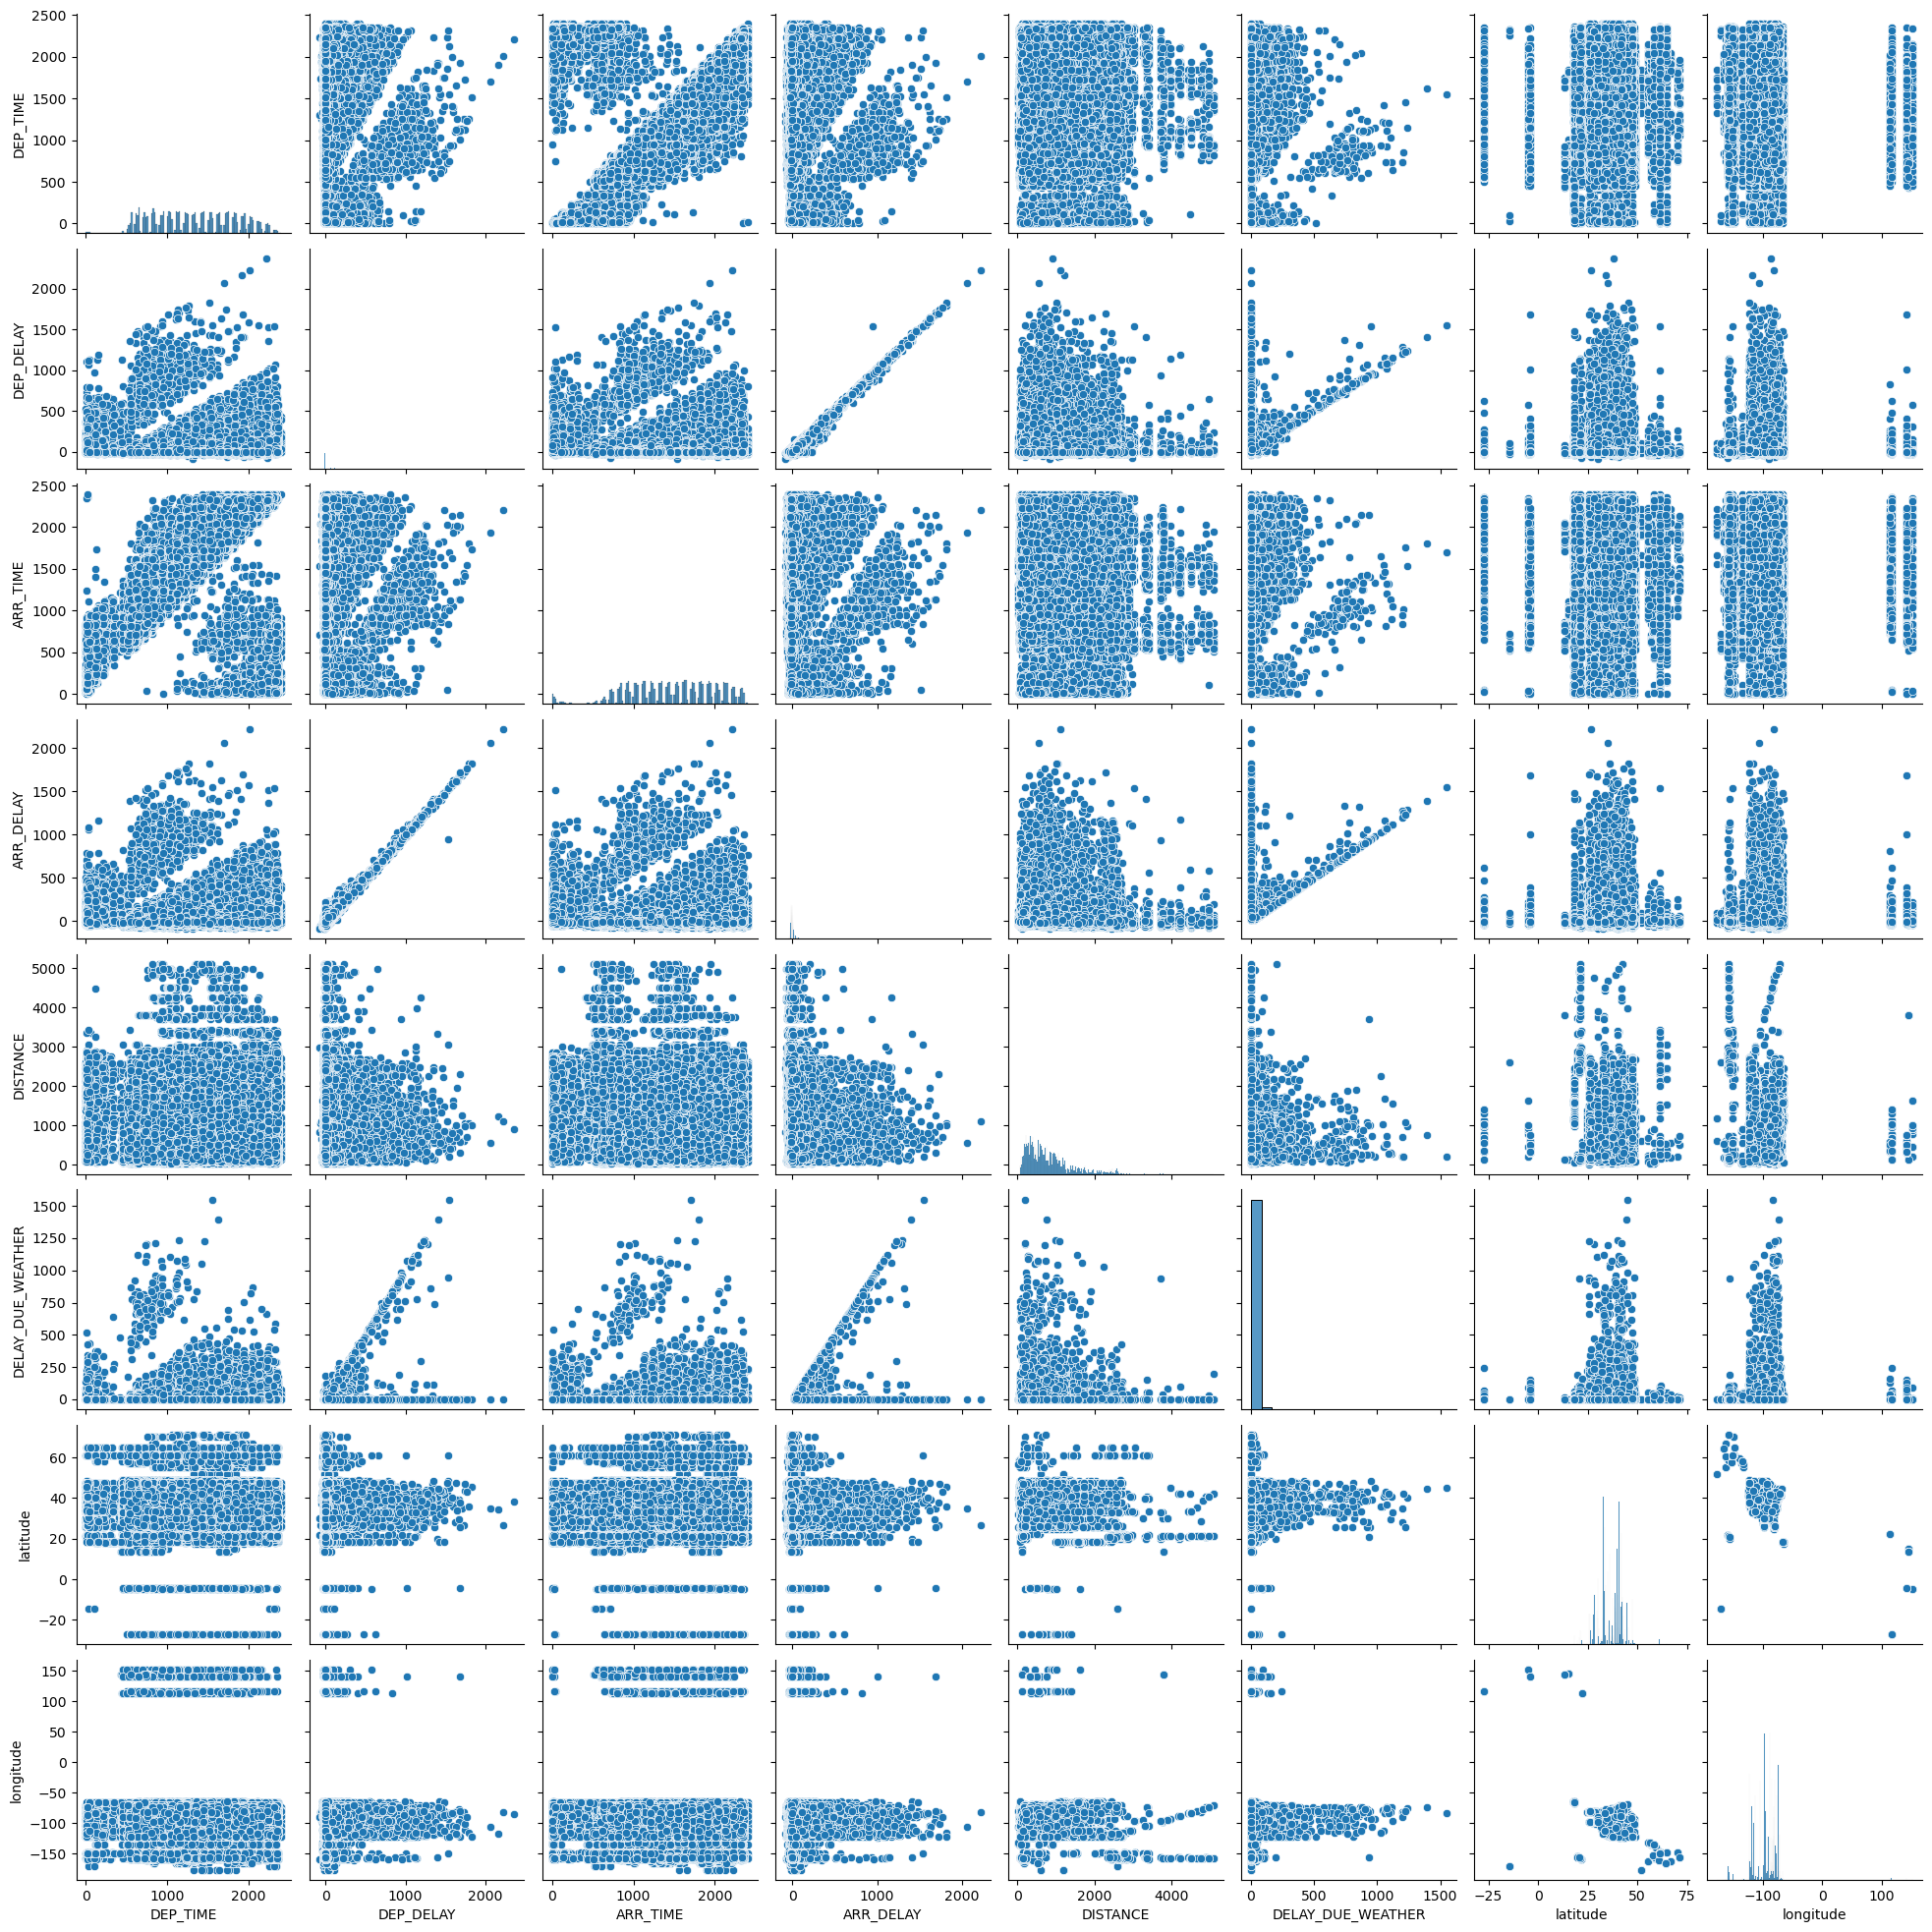

In [32]:
# Create a pair plot 

pp = sns.pairplot(df_test)

In [33]:
pp.savefig('pairplot.png')

#### Am curious in the scatterplot showing a linear relationship between DELAY_DUE_WEATHER and DEP_DELAY with an additional line at the bottom suggests a more complex relationship between the two variables. The main linear trend indicates a positive correlation, meaning that as one variable (dep_delay) increases, the other (delay_due_weather) also tends to increase.

#### The presence of another line at the bottom could indicate the existence of a subset of data points with a different pattern or behavior. This could be due to certain conditions or factors influencing the relationship between weather_delay and dep_delay. It's important to investigate and understand the nature of these points to gain insights into the overall data behavior.

#### A scatterplot showing parallel lines of data points for arr_time and dep_time suggests a consistent time difference or time offset between arrival and departure times. A scatterplot with parallel data point clusters for distance and latitude suggests that there may not be a clear linear relationship between these two variables. The lack of convergence or divergence in the clusters indicates that changes in latitude do not correspond to systematic changes in the distance variable


## Categorical Plot

C:\Users\Leeza\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


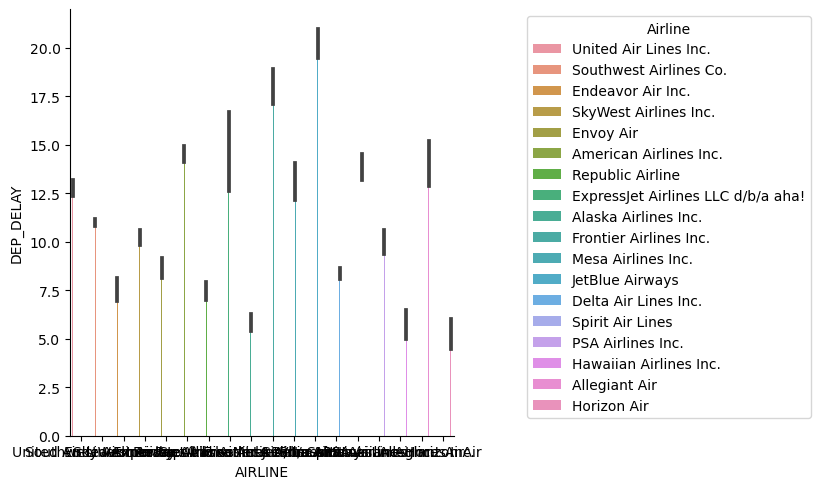

In [44]:
# Categorical plot based on airline and departure delay
bar_plot = sns.catplot(x='AIRLINE', y='DEP_DELAY', data=df, kind='bar',hue='AIRLINE', legend_out=True)
# Adjust the legend
bar_plot.ax.legend(title='Airline', loc='upper right', bbox_to_anchor=(1.95, 1))
plt.savefig('catplot.png')
plt.show()

#### American Airlines Inc. exhibits the highest departure delay among all airlines.This suggests that passengers flying with American Airlines Inc. may experience longer wait times before their flights depart.Horizon Air stands out with the minimum departure delay.

C:\Users\Leeza\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


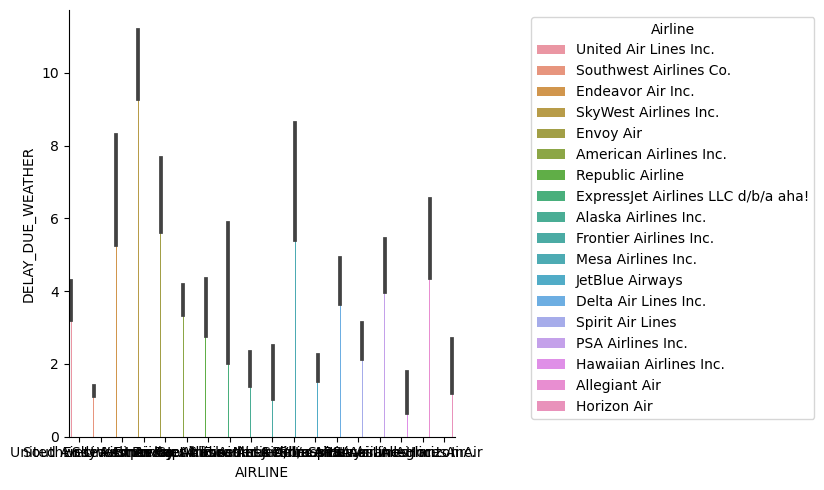

In [46]:
# Categorical plot based on airline and delay_due_weather
bar_plt = sns.catplot(x='AIRLINE', y='DELAY_DUE_WEATHER', data=df, kind='bar',hue='AIRLINE', legend_out=True)
# Adjust the legend
bar_plt.ax.legend(title='Airline', loc='upper right', bbox_to_anchor=(1.95, 1))
plt.savefig('catplot.png')
plt.show()

#### SkyWest Airlines Inc. experiences the highest delay attributed to weather conditions.Horizon Air stands out with the minimum delay due to weather.

### Insights on Key Questions 

#### Airlines with the Best On-Time Performance: The bar plots or categorical plots comparing different airlines' on-time performance helps us identify which airlines have the best performance. For example: Horizon Air is experiencing miminal departure delays and delays due to weather.
#### Airlines Consistently Facing Higher Delays or Cancellations: Bar plots and statistical analysis reveal if certain airlines are consistently facing higher delays or cancellations. 
#### Correlation Between Flight Distance and Likelihood of Delays:The scatterplot analysis, specifically clusters of points, provides insights into the correlation between flight distance and the likelihood of delays.

### Hypotheses

#### There is a significant linear correlation between arrival delay and departure delay.
#### There is a significant correlation between flight distance and the likelihood of delays.
#### Certain airports are more prone to specific types of delays and experience consistently higher delays or cancellations.
